In [30]:
from typing import Set, NamedTuple, List, Tuple, Dict, Iterable
import re
import math
from collections import defaultdict



In [31]:
def tokenize(txt:str) -> Set[str]:
    text = txt.lower()
    all_words = re.findall("[a-z0-9]+", text)
    return set(all_words)

assert tokenize("Dzisiaj jest 08.04.2025") == {"dzisiaj", "jest", "08", "04", "2025"}

example_text = "bylem dzisiaj w sklepeie i w tym sklepie widzialem banany, banany byly ok ale nie wszystkie byly ok ale i tak wzialem 2 banany i bylem zadowolony, jest godzina 12.03 a mam jeszce 2 koncerty do 24:03"

# for i in tokenize(example_text):
#     print(i)

In [32]:
class Message(NamedTuple):
    text:str
    is_spam: bool

In [33]:
# class TEST(NamedTuple):
#     number: int
#     name:str
#     is_you: bool

# test = TEST(1, 'Daniel', True)
# print(test.is_you)
# print(test.number)
# print(test.name)

In [34]:
class NaiveBayesClassifier:
    def __init__(self, k:float = 0.5) -> None:
        self.k = k

        self.tokens: Set[str] = set()
        self.token_spam_count: Dict[str, int] = defaultdict(int)
        self.token_ham_count: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0 

In [35]:
def train(self, messages: Iterable[Message]) -> None:
    for message in messages:
        if message.is_spam:
            self.spam_messages +=1

        else:
            self.ham_messages +=1
        
        for token in tokenize(message.text):
            self.tokens.add(token)
            if message.is_spam:
                self.token_spam_counts[token] += 1
            else:
                self.token_ham_counts[token] += 1


In [36]:
def _propablities(self, token: str) -> Tuple[float, float]:
    spam = self.token_spam_counts[token]
    ham = self.token_ham_counts[token]

    p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
    p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

    return p_token_spam, p_token_ham

    

In [37]:
def predict(self, text:str) -> float:
    text_tokens = tokenize(text)
    log_prob_if_spam = log_prob_if_ham = 0.0

    for token in self.tokens:
        prob_if_spam, prob_if_ham = self._propabilities(token)

        if token in text_tokens:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_ham += math.log(prob_if_ham)

        else:
            log_prob_if_spam += math.log(1.0 - prob_if_spam) 
            log_prob_if_ham += math.log(1.0 - prob_if_ham)

    prob_if_spam = math.exp(log_prob_if_spam) 
    prob_if_ham = math.exp(log_prob_if_ham)

    return prob_if_spam/(prob_if_spam + prob_if_ham) 


In [1]:
messeges = [Message("spam rules", is_spam=True),
            Message("ham rules", is_spam=False),
            Message("hello ham", is_spam=False)]

model = NaiveBayesClassifier(k=0.5)
model.train(messeges)


NameError: name 'Message' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

messages = [
    ("buy cheap meds now", 1),  # 1 - spam
    ("hello, how are you?", 0),  # 0 - ham (nie spam)
    ("limited time offer", 1),   # 1 - spam
    ("let's meet tomorrow", 0),  # 0 - ham
]


texts, labels = zip(*messages)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

X_tarin , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = MultinomialNB()
model.fit(X_tarin, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


test_data = [("Hello my name is Adam",1),
             ("Hello he is name's John",0),
             ("Our Adam is not John",1),
             ("Hello my name is Adam",1),
             ("Hello he is name's John",0),
             ("Our Adam is not John",1),
             ("abc bcd ", 0)]


text, label = zip(*test_data)
vectorize = CountVectorizer()

matrix = vectorize.fit_transform(text)
y = label

x_train , x_test, y_train, y_test = train_test_split(matrix, label, test_size=0.2, random_state=22)

model = MultinomialNB()
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(pred)

new = "Hello abc John"

new_vec = vectorize.transform([new])
predv2 = model.predict(new_vec)
print(predv2)



[0 1]
[0]


Przeiwdywany wynik: Spam
1________________________________________________________
Dokładność modelu wynosi: 62.5%
2________________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

3________________________________________________________
[[3 2]
 [1 2]]
4________________________________________________________

Cross-validation scores (5-fold): [0.5  0.75 0.5  0.5  1.  ]
Średnia dokładność: 0.65
5________________________________________________________


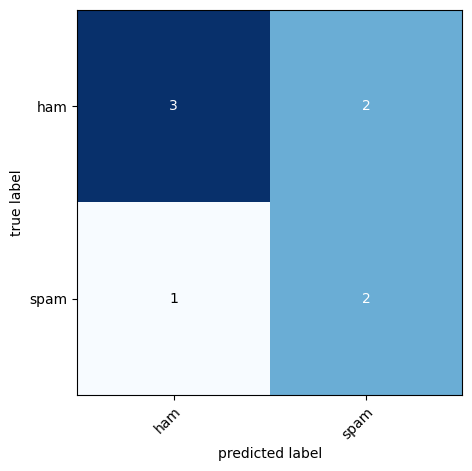

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

ex_mess = [
    ("Congratulations! You've won a free cruise to the Bahamas!", 1),
    ("Don't miss out on this limited-time offer!", 1),
    ("Can we meet tomorrow to discuss the project?", 0),
    ("Reminder: your appointment is scheduled for 3 PM.", 0),
    ("Claim your $1000 gift card now!", 1),
    ("Hi Anna, just checking in to see how you're doing.", 0),
    ("Get cheap meds without prescription – order now!", 1),
    ("Meeting notes from yesterday's team sync", 0),
    ("Exclusive deal for valued customers only", 1),
    ("Are you coming to the birthday party?", 0),
    ("Earn money from home – start today!", 1),
    ("Can you send me the files by Monday?", 0),
    ("This is your final notice to pay your bill!", 1),
    ("Lunch tomorrow?", 0),
    ("Free entry in a weekly prize draw!", 1),
    ("Thanks for your email – I'll respond shortly.", 0),
    ("New online course: Learn Python in 30 days", 0),
    ("Win a brand new iPhone by clicking this link!", 1),
    ("Attached is the invoice for your recent purchase.", 0),
    ("Act now – offer expires soon!", 1)
]


texts , labels = zip(*ex_mess)

vectorizer_2 = CountVectorizer()
text_to_binary_vectors = vectorizer_2.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(text_to_binary_vectors, labels,train_size=0.60, random_state=69 )


model = MultinomialNB()
model.fit(X_train, y_train)

prediction = model.predict(X_test)


new_text = "New online course: Learn Python in 30 days"

new_text_vectorize = vectorizer_2.transform([new_text])
prediction = model.predict(new_text_vectorize)



print(f"Przeiwdywany wynik: {(lambda prediction: 'Spam' if prediction == 0 else 'Ham')(prediction)}")
print("1________________________________________________________")
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, model.predict(X_test))
print(f"Dokładność modelu wynosi: {round(acc * 100, 2)}%")
print("2________________________________________________________")


from sklearn.metrics import classification_report
print(classification_report(y_test , model.predict(X_test)))
print("3________________________________________________________")


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test)))
print("4________________________________________________________")


from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, text_to_binary_vectors, labels, cv=5)
print("\nCross-validation scores (5-fold):", scores)
print("Średnia dokładność:", scores.mean())
print("5________________________________________________________")

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred = model.predict(X_test)
)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), class_names=["ham", "spam"])
plt.show()




22.94755241346897 0.9038659456058731


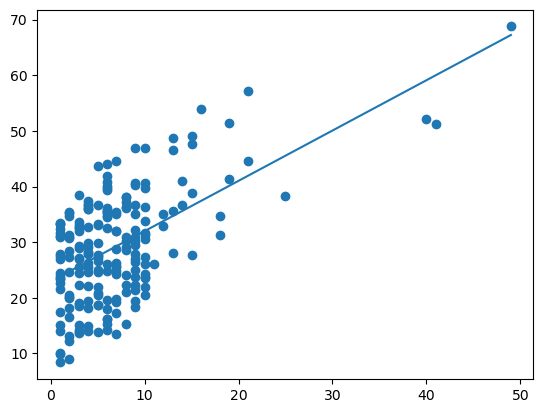

array([[0],
       [1],
       [2],
       [3],
       [5],
       [6],
       [7],
       [8]])

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scratch.statistics import correlation, standard_deviation, mean, num_friends_good,daily_minutes_good
import matplotlib.pyplot as plt

X = np.array(num_friends_good).reshape(-1,1)
y = np.array(daily_minutes_good)

model = LinearRegression()
model.fit(X, y)

alpha = model.intercept_
beta = model.coef_[0]
print(alpha,beta)

r_squared = model.score(X, y)

ys = [alpha + x * beta for x in num_friends_good]
xs = num_friends_good

plt.plot(xs, ys)
plt.scatter(num_friends_good, daily_minutes_good)
plt.show()

test_X = np.array([range(4),range(5,9)]).reshape(-1,1)
test_X

# REGRESJA

### Liniowa

mse: 232.2364741257962
r2: -0.005135140124632009
Współczynnik nachylenia (beta): 0.1145207090269455
Wyraz wolny (alpha): 21.19332517097344


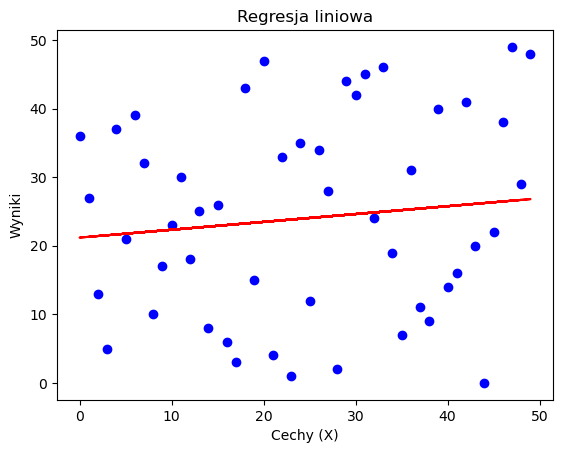

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random

np.random.seed(0)
x = np.array(range(50)).reshape(-1,1)
y = np.array(range(50))

np.random.shuffle(x)
np.random.shuffle(y)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print(f"mse: {mse}")

r2 = r2_score(y_test,y_pred)
print(f"r2: {r2}")



print(f"Współczynnik nachylenia (beta): {slope}")
print(f"Wyraz wolny (alpha): {intercept}")

plt.scatter(x,y,color = "blue")
plt.plot(x , model.predict(x), color = 'red')
plt.xlabel("Cechy (X)")
plt.ylabel("Wyniki")
plt.title("Regresja liniowa")
plt.show()

### Wieloraka

Współczynniki (beta): [0.02601356 0.03515394 0.04031698]
Wyraz wolny (alpha): 21.159395227716264
MSE: 258.99074846403784
R²: -0.3828327645044467


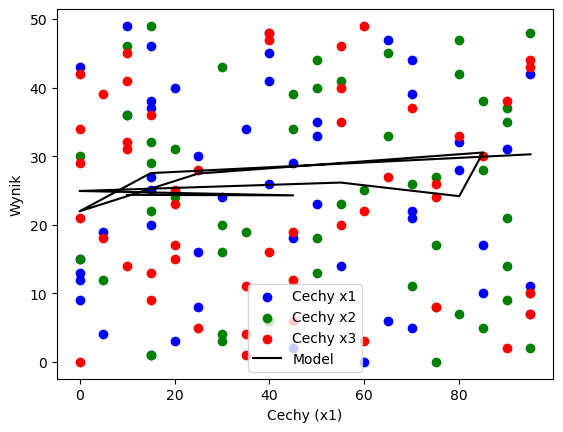

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

np.random.seed(0)
choices = range(0,100, 5)

x = np.array([np.random.choice(choices,3) for _ in range(50)])
y = np.array(range(len(x)))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

model = LinearRegression()
model.fit(x_train,y_train)

print(f"Współczynniki (beta): {model.coef_}")
print(f"Wyraz wolny (alpha): {model.intercept_}")

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


plt.scatter(x[:, 0], y, color='blue', label='Cechy x1')
plt.scatter(x[:, 1], y, color='green', label='Cechy x2')
plt.scatter(x[:, 2], y, color='red', label='Cechy x3')

# Rysujemy wykres regresji na podstawie jednej cechy, np. x[:, 0]
plt.plot(x_test[:, 0], y_pred, color='black', label='Model')

# Oznaczenia wykresu
plt.xlabel('Cechy (x1)')
plt.ylabel('Wynik')
plt.legend()
plt.show()

Współczynniki (beta): [ 2.5 -2.5]
Wyraz wolny (alpha): 75.0
MSE: 0.0
R²: 1.0


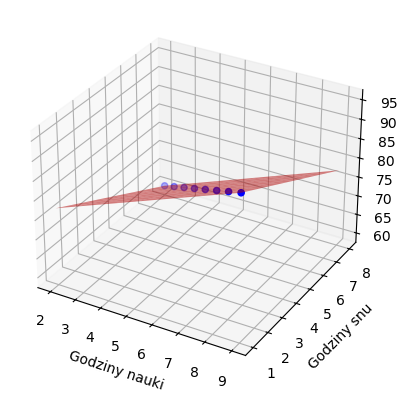

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Przykładowe dane
# x1: godziny nauki, x2: godziny snu
x = np.array([[2, 8], [3, 7], [4, 6], [5, 5], [6, 4], [7, 3], [8, 2], [9, 1]])
# y: wynik, np. ocena
y = np.array([60, 65, 70, 75, 80, 85, 90, 95])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

# Współczynniki regresji i wyraz wolny
print(f"Współczynniki (beta): {model.coef_}")
print(f"Wyraz wolny (alpha): {model.intercept_}")

# Predykcja na danych testowych
y_pred = model.predict(x_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

# Wykres dla dwóch cech
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Współrzędne: x1, x2, y
ax.scatter(x[:, 0], x[:, 1], y, color='blue')

# Oś x1, x2
ax.set_xlabel('Godziny nauki')
ax.set_ylabel('Godziny snu')
ax.set_zlabel('Ocena')

# Regresja (przewidywania)
x1_range = np.linspace(min(x[:, 0]), max(x[:, 0]), 10)
x2_range = np.linspace(min(x[:, 1]), max(x[:, 1]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# Powierzchnia dopasowana
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

plt.show()
